In [122]:
#Importing all models that will be used
from numpy import genfromtxt
import sklearn
import numpy as np
import random
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


In [123]:
my_data = genfromtxt('winequality-white.csv', delimiter=',') 
#This dataset can be found in the follow site:---
#http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
"""
Input variables (based on physicochemical tests):
   0 - fixed acidity 
   1 - volatile acidity
   2 - citric acid
   3 - residual sugar
   4 - chlorides
   5 - free sulfur dioxide
   6 - total sulfur dioxide
   7 - density
   8 - pH
   9 - sulphates
   10 - alcohol
   
Output variable (based on sensory data): 
   11 - quality (score between 0 and 10)
"""

'\nInput variables (based on physicochemical tests):\n   0 - fixed acidity \n   1 - volatile acidity\n   2 - citric acid\n   3 - residual sugar\n   4 - chlorides\n   5 - free sulfur dioxide\n   6 - total sulfur dioxide\n   7 - density\n   8 - pH\n   9 - sulphates\n   10 - alcohol\n   \nOutput variable (based on sensory data): \n   11 - quality (score between 0 and 10)\n'

In [124]:
#The original data has quality of alcohol scored between 0-10. Here we are trying to reduce the number of classes but breaking up
#rating into "Good" vs. "Bad", if rating > 5, then its a "Good" wine (i.e 1) else "Bad" wine (i.e 0)
for i in my_data:
    if (i[11] > 5):
        i[11] = 1
    else:
        i[11] = 0        
good_instances = []
bad_instances = []

for i in my_data:
    if (i[11] ==1):
        good_instances.append(i)
    else:
        bad_instances.append(i)       
   

In [125]:

#Recursive Feature Elimination
# feature extraction
#print("Recursive Feature Elimination")
#print("-----------------------------")
#x = my_data[:,0:11]
#y = my_data[:,11]
#model = LogisticRegression()
#rfe = RFE(model, 1)
#fit = rfe.fit(x, y.ravel())
#print("Choose the index of elements in the order presented: ",fit.ranking_)

In [126]:
def DecisionTreePrediction(test_x,test_y,x_resampled, y_resampled):
    
    from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model.fit(x_resampled,y_resampled)
    y_predict = model.predict(test_x)
    from sklearn.metrics import accuracy_score
    n1,d1,n0,d0 = 0,0,0,0
    for i in range(len(test_y)):
        if (int(test_y[i]) == 1):
            d1+=1
            if (test_y[i] == y_predict[i]):
                n1+=1
        if (int(test_y[i]) == 0.0):
            d0+=1
            if (test_y[i] == y_predict[i]):
                n0+=1
        
    acc1 = n1/d1
    acc0 = n0/d0  
            
    return(acc1,acc0,accuracy_score(test_y,y_predict))
       

In [127]:
def NaiveBayesPrediction(test_x,test_y,x_resampled, y_resampled):
    
    #without SMOTE
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_resampled,y_resampled)
    y_predict = model.predict(test_x)
    from sklearn.metrics import accuracy_score
    n1,d1,n0,d0 = 0,0,0,0
    for i in range(len(test_y)):
        if (int(test_y[i]) == 1):
            d1+=1
            if (test_y[i] == y_predict[i]):
                n1+=1
        if (int(test_y[i]) == 0.0):
            d0+=1
            if (test_y[i] == y_predict[i]):
                n0+=1
    acc1 = n1/d1
    acc0 = n0/d0  
            
    return(acc1,acc0,accuracy_score(test_y,y_predict))
    
    

In [128]:
def KNNPrediction(test_x,test_y,x_resampled, y_resampled):
    
    #without SMOTE
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(x_resampled,y_resampled)
    y_predict = model.predict(test_x)
    from sklearn.metrics import accuracy_score
    n1,d1,n0,d0 = 0,0,0,0
    for i in range(len(test_y)):
        if (int(test_y[i]) == 1):
            d1+=1
            if (test_y[i] == y_predict[i]):
                n1+=1
        if (int(test_y[i]) == 0.0):
            d0+=1
            if (test_y[i] == y_predict[i]):
                n0+=1
        
    acc1 = n1/d1
    acc0 = n0/d0  
            
    return(acc1,acc0,accuracy_score(test_y,y_predict))

In [129]:
def LogitPrediction(test_x,test_y,x_resampled, y_resampled):
    
    #without SMOTE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_resampled,y_resampled)
    y_predict = model.predict(test_x)
    from sklearn.metrics import accuracy_score
    n1,d1,n0,d0 = 0,0,0,0
    for i in range(len(test_y)):
        if (int(test_y[i]) == 1):
            d1+=1
            if (test_y[i] == y_predict[i]):
                n1+=1
        if (int(test_y[i]) == 0.0):
            d0+=1
            if (test_y[i] == y_predict[i]):
                n0+=1
    acc1 = n1/d1
    acc0 = n0/d0  
            
    return(acc1,acc0,accuracy_score(test_y,y_predict))
    

In [130]:
 
train_gi = good_instances[0:2450]
train_bi = bad_instances[0:50]
    
test_bi = []
test_gi = []
for i in range(101,601):
    test_bi.append(bad_instances[i])
    test_gi.append(good_instances[2500+i])
        
train_raw = np.append(train_gi,train_bi,axis=0)
train_shuffle = np.take(train_raw,np.random.permutation(train_raw.shape[0]),axis=0,out=train_raw)
train_x = np.delete(train_shuffle,np.s_[11:12],axis=1)
train_y = np.delete(train_shuffle,np.s_[0:11],axis=1)

test_raw = np.append(test_gi,test_bi,axis=0)
test_shuffle = np.take(test_raw,np.random.permutation(test_raw.shape[0]),axis=0,out=test_raw)
test_x = np.delete(test_shuffle,np.s_[11:12],axis=1)
test_y = np.delete(test_shuffle,np.s_[0:11],axis=1)




In [131]:
#Printing accuracy of class1, class0 and overall for different classifiers

print (DecisionTreePrediction(test_x,test_y.ravel(),train_x, train_y.ravel()))
print (NaiveBayesPrediction(test_x,test_y.ravel(),train_x, train_y.ravel()))
print (KNNPrediction(test_x,test_y.ravel(),train_x, train_y.ravel()))
print (LogitPrediction(test_x,test_y.ravel(),train_x, train_y.ravel()))

(0.978, 0.094, 0.53600000000000003)
(0.984, 0.152, 0.56799999999999995)
(0.996, 0.002, 0.499)
(1.0, 0.0, 0.5)


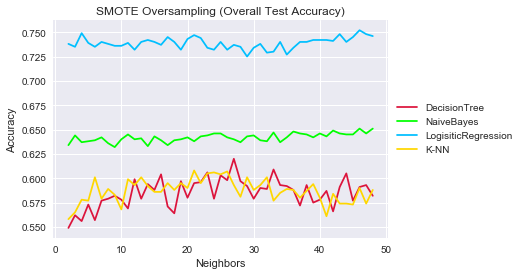

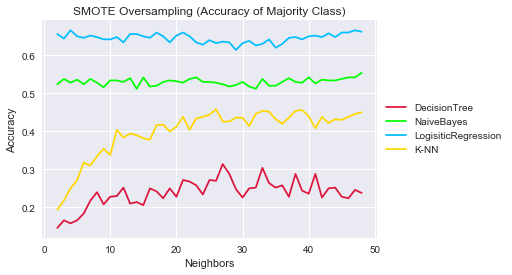

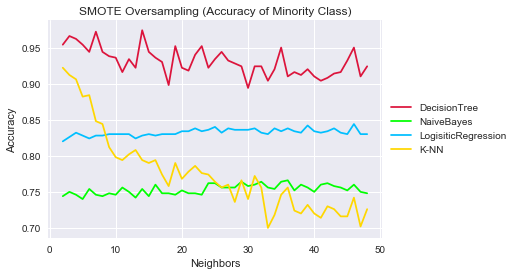

0.62 0.651 0.752 0.608
0.314 0.554 0.666 0.458
0.974 0.766 0.844 0.922


In [204]:
#regular SMOTE
from imblearn.over_sampling import ADASYN
DTAcc = []
NBAcc = []
LRAcc = []
KNAcc = []
DTAcc1 = []
NBAcc1 = []
LRAcc1 = []
KNAcc1 = []
DTAcc0 = []
NBAcc0 = []
LRAcc0 = []
KNAcc0 = []


for k in range(2,49):
    xs,ys = SMOTE(ratio='minority',k_neighbors = k).fit_sample(train_x,train_y.ravel())
    DTAcc.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    NBAcc.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    LRAcc.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    KNAcc.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    
    DTAcc1.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    NBAcc1.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    LRAcc1.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    KNAcc1.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    
    DTAcc0.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    NBAcc0.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    LRAcc0.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    KNAcc0.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
t = range(2,49)


l = plot(t,DTAcc, 'crimson', label='DecisionTree')
l = plot(t,NBAcc, 'lime', label='NaiveBayes')
l = plot(t,LRAcc, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc, 'gold', label='K-NN')
plt.title("SMOTE Oversampling (Overall Test Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc1, 'crimson', label='DecisionTree')
l = plot(t,NBAcc1, 'lime', label='NaiveBayes')
l = plot(t,LRAcc1, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc1, 'gold', label='K-NN')
plt.title("SMOTE Oversampling (Accuracy of Majority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc0, 'crimson', label='DecisionTree')
l = plot(t,NBAcc0, 'lime', label='NaiveBayes')
l = plot(t,LRAcc0, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc0, 'gold', label='K-NN')
plt.title("SMOTE Oversampling (Accuracy of Minority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

print(max(DTAcc),max(NBAcc),max(LRAcc),max(KNAcc))
print(max(DTAcc1),max(NBAcc1),max(LRAcc1),max(KNAcc1))
print(max(DTAcc0),max(NBAcc0),max(LRAcc0),max(KNAcc0))

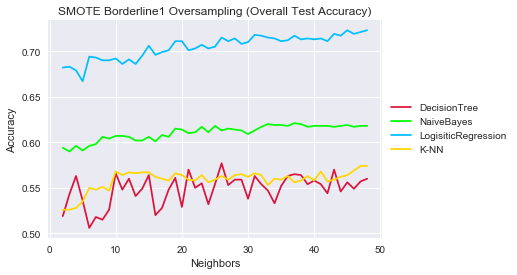

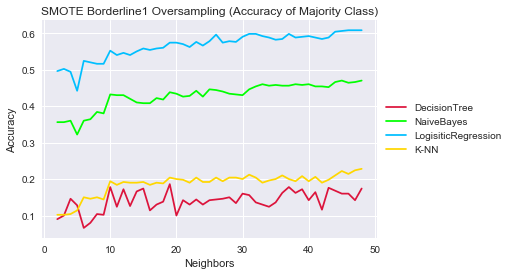

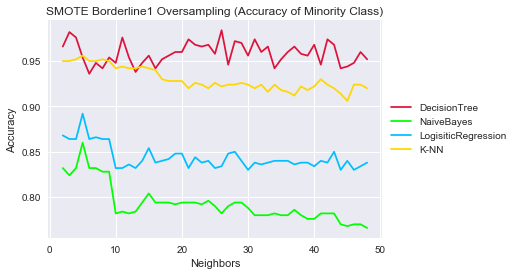

0.577 0.621 0.723 0.574
0.186 0.47 0.608 0.228
0.984 0.86 0.892 0.956


In [205]:
#Borderline SMOTE
from imblearn.over_sampling import ADASYN
DTAcc = []
NBAcc = []
LRAcc = []
KNAcc = []
DTAcc1 = []
NBAcc1 = []
LRAcc1 = []
KNAcc1 = []
DTAcc0 = []
NBAcc0 = []
LRAcc0 = []
KNAcc0 = []


for k in range(2,49):
    xs,ys = SMOTE(ratio='minority',kind = 'borderline1',m_neighbors = k).fit_sample(train_x,train_y.ravel())
    DTAcc.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    NBAcc.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    LRAcc.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    KNAcc.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    
    DTAcc1.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    NBAcc1.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    LRAcc1.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    KNAcc1.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    
    DTAcc0.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    NBAcc0.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    LRAcc0.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    KNAcc0.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
t = range(2,49)


l = plot(t,DTAcc, 'crimson', label='DecisionTree')
l = plot(t,NBAcc, 'lime', label='NaiveBayes')
l = plot(t,LRAcc, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc, 'gold', label='K-NN')
plt.title("SMOTE Borderline1 Oversampling (Overall Test Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc1, 'crimson', label='DecisionTree')
l = plot(t,NBAcc1, 'lime', label='NaiveBayes')
l = plot(t,LRAcc1, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc1, 'gold', label='K-NN')
plt.title("SMOTE Borderline1 Oversampling (Accuracy of Majority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc0, 'crimson', label='DecisionTree')
l = plot(t,NBAcc0, 'lime', label='NaiveBayes')
l = plot(t,LRAcc0, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc0, 'gold', label='K-NN')
plt.title("SMOTE Borderline1 Oversampling (Accuracy of Minority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

print(max(DTAcc),max(NBAcc),max(LRAcc),max(KNAcc))
print(max(DTAcc1),max(NBAcc1),max(LRAcc1),max(KNAcc1))
print(max(DTAcc0),max(NBAcc0),max(LRAcc0),max(KNAcc0))

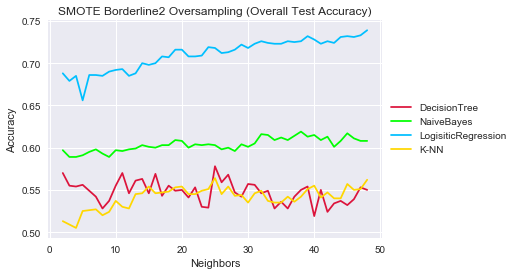

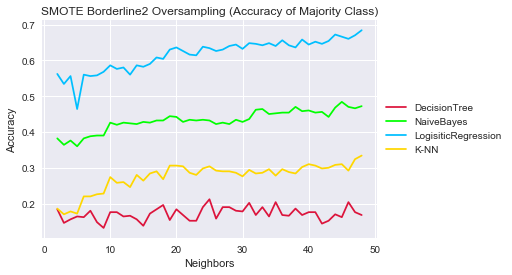

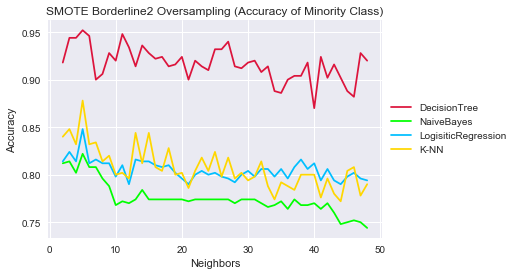

0.578 0.619 0.739 0.564
0.212 0.484 0.684 0.334
0.952 0.822 0.848 0.878


In [206]:
#Borderline SMOTE
from imblearn.over_sampling import ADASYN
DTAcc = []
NBAcc = []
LRAcc = []
KNAcc = []
DTAcc1 = []
NBAcc1 = []
LRAcc1 = []
KNAcc1 = []
DTAcc0 = []
NBAcc0 = []
LRAcc0 = []
KNAcc0 = []


for k in range(2,49):
    xs,ys = SMOTE(ratio='minority',kind = 'borderline2',m_neighbors = k).fit_sample(train_x,train_y.ravel())
    DTAcc.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    NBAcc.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    LRAcc.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    KNAcc.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    
    DTAcc1.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    NBAcc1.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    LRAcc1.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    KNAcc1.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    
    DTAcc0.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    NBAcc0.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    LRAcc0.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    KNAcc0.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
t = range(2,49)


l = plot(t,DTAcc, 'crimson', label='DecisionTree')
l = plot(t,NBAcc, 'lime', label='NaiveBayes')
l = plot(t,LRAcc, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc, 'gold', label='K-NN')
plt.title("SMOTE Borderline2 Oversampling (Overall Test Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc1, 'crimson', label='DecisionTree')
l = plot(t,NBAcc1, 'lime', label='NaiveBayes')
l = plot(t,LRAcc1, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc1, 'gold', label='K-NN')
plt.title("SMOTE Borderline2 Oversampling (Accuracy of Majority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc0, 'crimson', label='DecisionTree')
l = plot(t,NBAcc0, 'lime', label='NaiveBayes')
l = plot(t,LRAcc0, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc0, 'gold', label='K-NN')
plt.title("SMOTE Borderline2 Oversampling (Accuracy of Minority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

print(max(DTAcc),max(NBAcc),max(LRAcc),max(KNAcc))
print(max(DTAcc1),max(NBAcc1),max(LRAcc1),max(KNAcc1))
print(max(DTAcc0),max(NBAcc0),max(LRAcc0),max(KNAcc0))

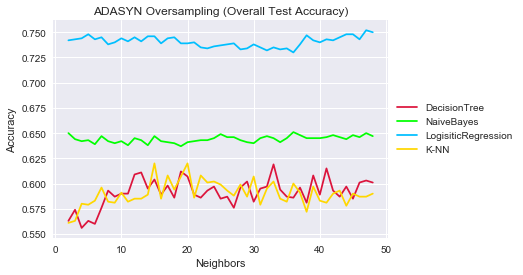

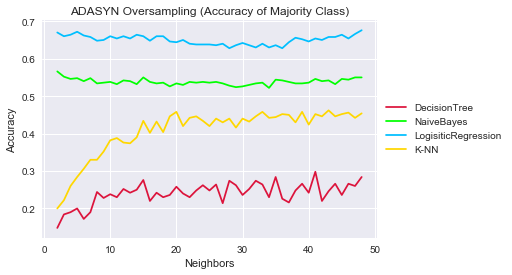

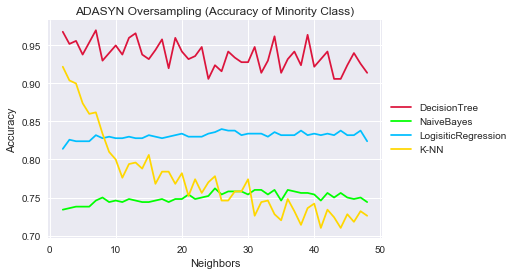

0.619 0.651 0.752 0.62
0.298 0.566 0.676 0.462
0.97 0.762 0.84 0.922


In [207]:
#ADASYN SMOTE
from imblearn.over_sampling import ADASYN
DTAcc = []
NBAcc = []
LRAcc = []
KNAcc = []
DTAcc1 = []
NBAcc1 = []
LRAcc1 = []
KNAcc1 = []
DTAcc0 = []
NBAcc0 = []
LRAcc0 = []
KNAcc0 = []


for k in range(2,49):
    xs,ys = ADASYN(ratio='minority',n_neighbors = k).fit_sample(train_x,train_y.ravel())
    DTAcc.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    NBAcc.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    LRAcc.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    KNAcc.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[2])
    
    DTAcc1.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    NBAcc1.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    LRAcc1.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    KNAcc1.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[1])
    
    DTAcc0.append(DecisionTreePrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    NBAcc0.append(NaiveBayesPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    LRAcc0.append(LogitPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])
    KNAcc0.append(KNNPrediction(test_x,test_y.ravel(),xs, ys.ravel())[0])

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
sns.set()
t = range(2,49)


l = plot(t,DTAcc, 'crimson', label='DecisionTree')
l = plot(t,NBAcc, 'lime', label='NaiveBayes')
l = plot(t,LRAcc, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc, 'gold', label='K-NN')
plt.title("ADASYN Oversampling (Overall Test Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc1, 'crimson', label='DecisionTree')
l = plot(t,NBAcc1, 'lime', label='NaiveBayes')
l = plot(t,LRAcc1, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc1, 'gold', label='K-NN')
plt.title("ADASYN Oversampling (Accuracy of Majority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

sns.set()
t = range(2,49)


l = plot(t,DTAcc0, 'crimson', label='DecisionTree')
l = plot(t,NBAcc0, 'lime', label='NaiveBayes')
l = plot(t,LRAcc0, 'deepskyblue', label='LogisiticRegression')
l = plot(t,KNAcc0, 'gold', label='K-NN')
plt.title("ADASYN Oversampling (Accuracy of Minority Class)")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")


legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()

print(max(DTAcc),max(NBAcc),max(LRAcc),max(KNAcc))
print(max(DTAcc1),max(NBAcc1),max(LRAcc1),max(KNAcc1))
print(max(DTAcc0),max(NBAcc0),max(LRAcc0),max(KNAcc0))